In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

# Ruta del archivo zip
zip_path = '/content/drive/MyDrive/Datasets/Wheather classfication image.zip'

# Directorio de extracción para las imágenes
PATH = '/content/Wheather classfication image'

# Crear el directorio de extracción si no existe
if not os.path.exists(PATH):
    os.makedirs(PATH)

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(PATH)

In [ ]:
# ------------------------------

PATH = '/content/Wheather classfication image/Weather Resized/Weather Resized' # <-------------

classes = os.listdir(PATH)
classes

['2', '0', '3', '1']

In [ ]:
# Define los nuevos nombres en español para cada carpeta
nombres_nuevos = {
    '0': 'Nublado',
    '1': 'Lluvia',
    '2': 'Soleado',
    '3': 'Amanecer'
}

# Directorio raíz
PATH = '/content/Wheather classfication image/Weather Resized/Weather Resized'

# Itera a través de las carpetas y cambia sus nombres
for carpeta in os.listdir(PATH):
    if carpeta in nombres_nuevos:
        carpeta_original = os.path.join(PATH, carpeta)
        carpeta_nueva = os.path.join(PATH, nombres_nuevos[carpeta])
        os.rename(carpeta_original, carpeta_nueva)

classes = os.listdir(PATH)
classes

['Nublado', 'Amanecer', 'Soleado', 'Lluvia']

In [ ]:
import random
from skimage import io
import matplotlib.pyplot as plt

imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')

  for img_path in paths:
    full_path = f'{PATH}/{lab}/{img_path}'
    img = io.imread(full_path)

    # Verificar si la imagen tiene 3 canales (RGB)
    if img.ndim == 3 and img.shape[2] == 3:
      imgs.append(full_path)
      labels.append(i)


Categoría: Nublado. Imágenes: 300
Categoría: Amanecer. Imágenes: 357
Categoría: Soleado. Imágenes: 253
Categoría: Lluvia. Imágenes: 215


In [ ]:
len(imgs)

1120

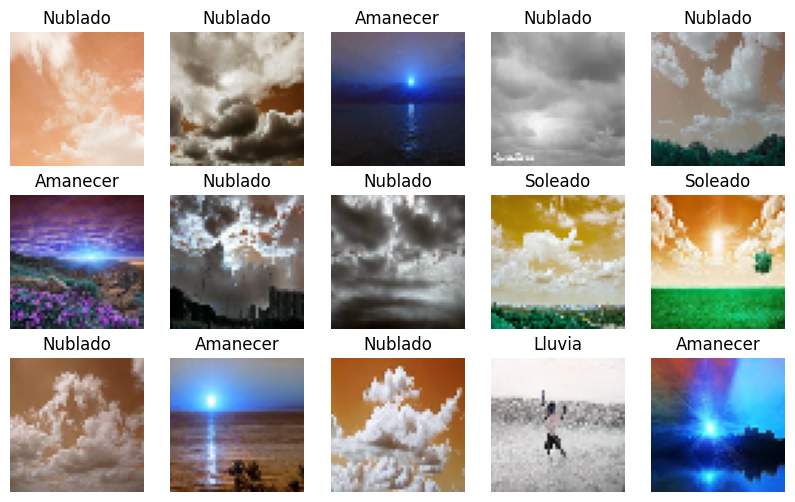

In [ ]:
import random
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])     # Texto
    ax.imshow(img)                # imagen
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [ ]:
# ------------------------------

from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(896, 224)

In [ ]:
# ------------------------------

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    #print(f"imagen: {img}")
    if self.trans:
      img = self.trans(image=img)["image"]
                                # Normalmente es Ancho Alto y Nº de Canales pero lo cambiamos a que sea el Nº de canales primero
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [ ]:
# ------------------------------

import albumentations as A

trans = A.Compose([
    A.Resize(50, 50)
])
# Aqui se crea el dataset
dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device),
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(896, 224)

In [ ]:
# ------------------------------

dataset['train'][2]

(tensor([[[0.0588, 0.0745, 0.0824,  ..., 0.1098, 0.0980, 0.0941],
          [0.0824, 0.0941, 0.1137,  ..., 0.1059, 0.1020, 0.0902],
          [0.1020, 0.1216, 0.1608,  ..., 0.0863, 0.0863, 0.0784],
          ...,
          [0.0510, 0.0706, 0.0588,  ..., 0.0000, 0.0039, 0.0157],
          [0.0000, 0.0745, 0.1333,  ..., 0.0627, 0.0471, 0.0353],
          [0.0078, 0.0157, 0.0196,  ..., 0.0275, 0.0314, 0.0392]],
 
         [[0.3294, 0.3569, 0.3804,  ..., 0.2039, 0.1922, 0.1882],
          [0.4235, 0.4510, 0.4824,  ..., 0.2078, 0.2078, 0.1961],
          [0.5255, 0.5569, 0.6078,  ..., 0.2157, 0.2157, 0.2078],
          ...,
          [0.2706, 0.3059, 0.2902,  ..., 0.0824, 0.0902, 0.0941],
          [0.1451, 0.2353, 0.3255,  ..., 0.0902, 0.0824, 0.0706],
          [0.0235, 0.0353, 0.0588,  ..., 0.0863, 0.0902, 0.1020]],
 
         [[0.6510, 0.6784, 0.6941,  ..., 0.3686, 0.3569, 0.3529],
          [0.7451, 0.7686, 0.7961,  ..., 0.3843, 0.3804, 0.3686],
          [0.9098, 0.9412, 0.9843,  ...,

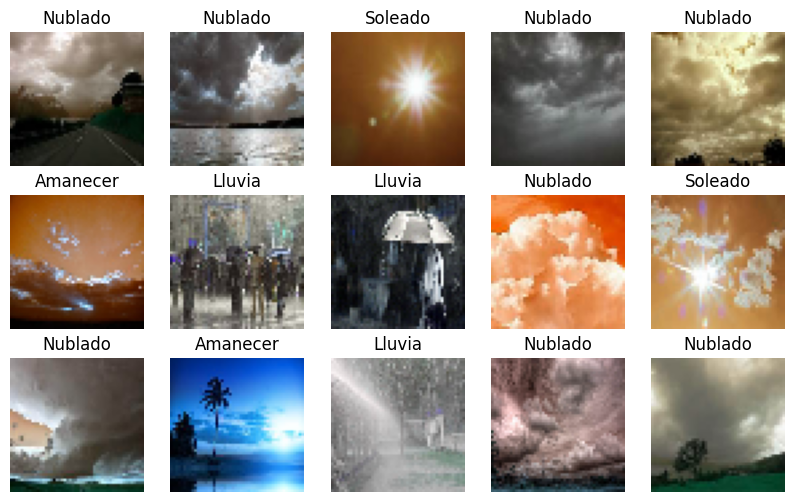

In [ ]:
# ------------------------------

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [ ]:
# ------------------------------

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 50, 50])

# **Usando el modelo**

In [ ]:
# ------------------------------

import torchvision.models as models
models.mobilenet_v2()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# ------------------------------

class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=5, pretrained=False, freeze=False):
    super().__init__()
    # descargamos mobilenet
    mobilenet = models.mobilenet_v2(pretrained=pretrained)
    # resnet = torchvision.models.resnet18(pretrained=pretrained)

    # nos quedamos con todas las capas menos la última
    self.mobilenet = torch.nn.Sequential(*list(mobilenet.children())[:-1])
    if freeze:
      for param in self.mobilenet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(5120, 4)

  def forward(self, x):
    x = self.mobilenet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.mobilenet.parameters():
        param.requires_grad=True

In [ ]:
# ------------------------------
#

model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 50, 50))
outputs.shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([64, 4])

In [ ]:
# ------------------------------
#

from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

# Entrenando desde Cero

In [ ]:
model_c = ModelCustom()
fit(model_c, dataloader, epochs=15)

val_loss 1.49872 val_acc 0.26786: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


Epoch 1/15 loss 1.73285 val_loss 1.49872 acc 0.35938 val_acc 0.26786


val_loss 1.64273 val_acc 0.26786: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Epoch 2/15 loss 0.85151 val_loss 1.64273 acc 0.62500 val_acc 0.26786


val_loss 1.63316 val_acc 0.26786: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


Epoch 3/15 loss 0.72641 val_loss 1.63316 acc 0.68862 val_acc 0.26786


val_loss 1.76547 val_acc 0.19196: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


Epoch 4/15 loss 0.57260 val_loss 1.76547 acc 0.75223 val_acc 0.19196


val_loss 1.18217 val_acc 0.45536: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Epoch 5/15 loss 0.46568 val_loss 1.18217 acc 0.81473 val_acc 0.45536


val_loss 0.67729 val_acc 0.69643: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


Epoch 6/15 loss 0.44022 val_loss 0.67729 acc 0.81696 val_acc 0.69643


val_loss 0.72631 val_acc 0.75446: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Epoch 7/15 loss 0.44842 val_loss 0.72631 acc 0.80357 val_acc 0.75446


val_loss 0.48758 val_acc 0.79911: 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]


Epoch 8/15 loss 0.48466 val_loss 0.48758 acc 0.81138 val_acc 0.79911


val_loss 0.60421 val_acc 0.81696: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


Epoch 9/15 loss 0.38794 val_loss 0.60421 acc 0.83371 val_acc 0.81696


val_loss 0.82139 val_acc 0.74554: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Epoch 10/15 loss 0.32701 val_loss 0.82139 acc 0.86607 val_acc 0.74554


val_loss 0.49869 val_acc 0.82589: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


Epoch 11/15 loss 0.29659 val_loss 0.49869 acc 0.88281 val_acc 0.82589


val_loss 0.61661 val_acc 0.80357: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


Epoch 12/15 loss 0.23781 val_loss 0.61661 acc 0.91183 val_acc 0.80357


val_loss 0.58955 val_acc 0.82143: 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


Epoch 13/15 loss 0.24172 val_loss 0.58955 acc 0.89955 val_acc 0.82143


val_loss 0.71376 val_acc 0.76786: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Epoch 14/15 loss 0.22918 val_loss 0.71376 acc 0.91295 val_acc 0.76786


val_loss 0.50389 val_acc 0.85714: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

Epoch 15/15 loss 0.20597 val_loss 0.50389 acc 0.91853 val_acc 0.85714


Precisión del 91%

# Transfer Learning

In [ ]:
model_c = ModelCustom(pretrained=True, freeze=True)
fit(model_c, dataloader, epochs=6)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
val_loss 0.99683 val_acc 0.57589: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


Epoch 1/6 loss 1.58886 val_loss 0.99683 acc 0.53571 val_acc 0.57589


val_loss 0.57880 val_acc 0.77232: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Epoch 2/6 loss 0.52066 val_loss 0.57880 acc 0.81920 val_acc 0.77232


val_loss 0.46688 val_acc 0.86161: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Epoch 3/6 loss 0.34718 val_loss 0.46688 acc 0.88728 val_acc 0.86161


val_loss 0.41329 val_acc 0.86161: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


Epoch 4/6 loss 0.27154 val_loss 0.41329 acc 0.92746 val_acc 0.86161


val_loss 0.37694 val_acc 0.87054: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Epoch 5/6 loss 0.28565 val_loss 0.37694 acc 0.90513 val_acc 0.87054


val_loss 0.37687 val_acc 0.86607: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

Epoch 6/6 loss 0.24214 val_loss 0.37687 acc 0.92076 val_acc 0.86607


Precisión del 92%

## Fine Tuning


In [ ]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader)
model_o.unfreeze()
print("-----------------------------------------------")
fit(model_o, dataloader, lr=1e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
val_loss 0.83466 val_acc 0.72768: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


Epoch 1/5 loss 1.64245 val_loss 0.83466 acc 0.51116 val_acc 0.72768


val_loss 0.73613 val_acc 0.76786: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


Epoch 2/5 loss 0.55294 val_loss 0.73613 acc 0.81473 val_acc 0.76786


val_loss 0.45234 val_acc 0.85714: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


Epoch 3/5 loss 0.33680 val_loss 0.45234 acc 0.89509 val_acc 0.85714


val_loss 0.48115 val_acc 0.84375: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Epoch 4/5 loss 0.34090 val_loss 0.48115 acc 0.88839 val_acc 0.84375


val_loss 0.39490 val_acc 0.88393: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Epoch 5/5 loss 0.25916 val_loss 0.39490 acc 0.92188 val_acc 0.88393
-----------------------------------------------


val_loss 0.38411 val_acc 0.88393: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Epoch 1/5 loss 0.23650 val_loss 0.38411 acc 0.92857 val_acc 0.88393


val_loss 0.38111 val_acc 0.87946: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Epoch 2/5 loss 0.21195 val_loss 0.38111 acc 0.93973 val_acc 0.87946


val_loss 0.37131 val_acc 0.88393: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Epoch 3/5 loss 0.20443 val_loss 0.37131 acc 0.94978 val_acc 0.88393


val_loss 0.37563 val_acc 0.88839: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Epoch 4/5 loss 0.20249 val_loss 0.37563 acc 0.93973 val_acc 0.88839


val_loss 0.37853 val_acc 0.88839: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

Epoch 5/5 loss 0.19557 val_loss 0.37853 acc 0.94196 val_acc 0.88839


Precisión del 94%

# Predicciones

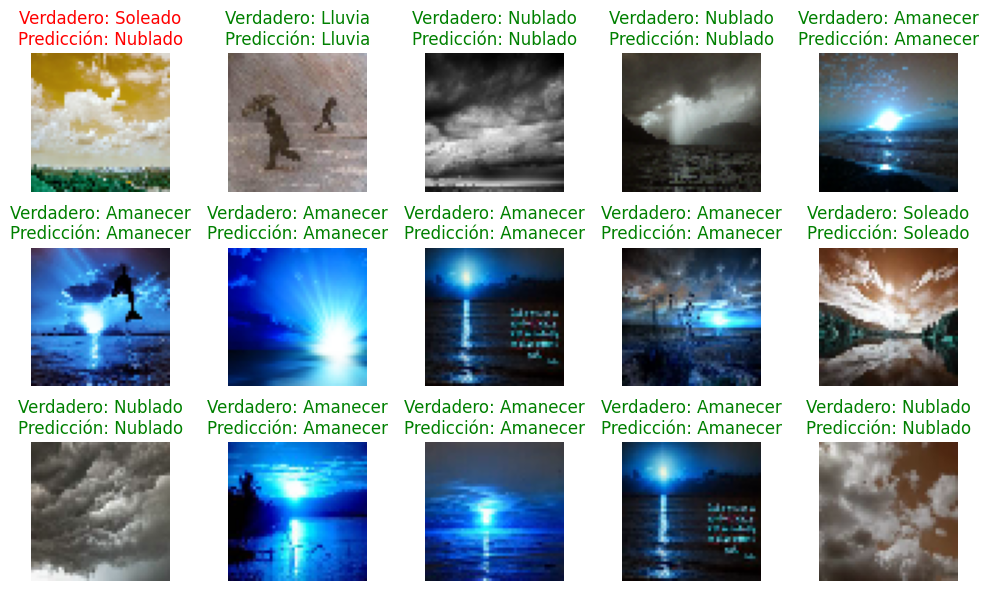

In [ ]:
import random
import matplotlib.pyplot as plt

def evaluate_image(model, image):
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        prediction = torch.argmax(output, dim=1).item()
    return prediction

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))

for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test']) - 1)      # Obtener un índice aleatorio
        img, true_label = dataset['test'][ix]                 # Obtener la imagen y la etiqueta verdadera
        prediction = evaluate_image(model_c, img.to(device))  # Realizar la predicción
        plt.imshow(img.permute(1, 2, 0).cpu().numpy())
        plt.axis("off")
        title_color = "green" if prediction == true_label else "red"
        plt.title(f"Verdadero: {classes[true_label]}\nPredicción: {classes[prediction]}", color=title_color)

plt.tight_layout()
plt.show()